# Programação Quadrática - Método de Hildreth

Este notebook contém a descrição de um problema de otimização com restrições, que será dividido em um problema Dual e um problema Primal com base nos critérios de Kuhn-Tucker. O método de Hildreth permite encontrar uma solução para o problema dual por meio de iterações sobre os multiplicadores de Lagrange.

Baseado em:
- Hildreth, Clifford. A Quadratic Programming Procedure

## Problema Primal-Dual

Reescrevemos o problema de minimização com restrições quebrando o problema em dois, um problema primal e um problema dual. O método dual pode ser usado para identificar sistematicamente o conjunto de restrições inativas, permitindo elimina-las da solução. O multiplicador de Lagrange é chamado de variável dual, ele método permite simplificar a busca da solução ótima do problema de minimização com restrições.

O problema dual é derivado, assumindo viabilidade tal que exista um $x$ que satisfaça as restrições $Mx < \gamma$, o problema dual é equivale a

\begin{equation}
\max _{\lambda \geq 0} \min _x\left[\frac{1}{2} x^T E x+x^T F+\lambda^T(M x-\gamma)\right] .
\end{equation}

A minimização em $x$ não depende de restrições, e têm valor de ótimo $x = -E^{-1}(F+M^T + \lambda)$,

Substituindo $x$ nos termos de $J$, temos:

\begin{equation*}
\begin{aligned}
    \frac{1}{2} x^T E x+x^T &=\frac{1}{2}(F^T+\lambda^TM)^TE^{-1}
    (F+M^T\lambda) = \frac{1}{2}F^T E^{-1}F + \frac{1}{2}F^TE^{-1}M^T\lambda + \frac{1}{2}\lambda^TME^{-1}F + \frac{1}{2} \lambda^TME^{-1}M^T\lambda   \\
    x^TF                    &= -F^TE^{-1}F - \lambda^TME^{-1}F  \\
    \lambda^T(Mx - \gamma) &= \lambda^TMx - \lambda^T\gamma  = -\lambda^T(ME^{-1}F + \gamma) -\lambda^TME^{-1}M^T\lambda
\end{aligned}
\end{equation*}

juntando tudo, temos que

\begin{equation*}
\begin{aligned}
    \frac{1}{2} x^T E x+x^T F+\lambda^T(M x-\gamma) = -\frac{1}{2}\lambda^TME^{-1}M\lambda - \lambda^T(ME^{-1} F + \gamma) -\frac{1}{2}FE^{-1}F
\end{aligned}
\end{equation*}

Daí, o problema dual pode ser rescrito como

\begin{equation*}
\begin{aligned}
    \max _{\lambda \geq 0} (-\frac{1}{2}\lambda^TH\lambda - \lambda^TK - \frac{1}{2}F^TE^{-1}F)
\end{aligned}
\end{equation*}

O problema dual em relação a $\lambda$ é também um problema quadrático equivalente a

\begin{equation*}
\begin{aligned}
    \min _{\lambda \geq 0} (\frac{1}{2}\lambda^TH\lambda + \lambda^TK + \frac{1}{2}F^TE^{-1}F)
\end{aligned}
\end{equation*}

onde
\begin{align}
    H &= ME^{-1}M^T \\
    K &= \gamma + ME^{-1}F
\end{align}

O conjunto ótimo dos multiplicadores de Lagrange que minimizam a função de custo sujeito a $\lambda \geq 0$, são denotados por $\lambda_{act}$, e corresponde as restrições descritas por $M_{act}$ e $\gamma_{act}$. Com os valores de $\lambda_{act}$ e $M_{act}$, a variável primal é obtida usando

\begin{equation*}
    x = -E^{-1}F -E^{-1}M_{act}^T\lambda_{act}
\end{equation*}

em que as restrições são tratadas como igualdades durante a computação.

## Procedimento de Hildreth

Para uma função de custo quadrática qualquer, dado por J

\begin{equation*}
    \min_{z \geq 0} \frac{1}{2}z^TAx + z^Tb
\end{equation*}
 
Pode-se encontrar $z$ que satisfaz a restrição impostas de forma iterativa considerando as restrições de desigualdade como igualdade, considerando apenas um elemento $z_i$ em $z$ variável a cada passo. Como queremos um valor em $z$ que minimiza $J$, fazemos:

\begin{equation*}
    \frac{\partial J}{\partial z_i} = \sum_{j=1}^{n}a_{i, j}z_{j} + b_{i} = 0
\end{equation*}

O vetor solução $z$ será calculado considerando uma constante variável de cada vez, em que $z_i$ é o termo que será atualizado. Assim, removendo o termo referente a $z_i$ do somatório

\begin{equation*}
    \overbrace{\sum_{j=1}^{i-1}a_{i, j}z_{j}}^{\text{Valores atualizados}} + a_{i, i}z_{i} + \overbrace{\sum_{j=i+1}^{n}a_{i, j}z_{j}}^{\text{Valores não atualizados}} + b_{i} = 0
\end{equation*}

Note que no $i$-ésimo passo, do primeiro elemento ao $i$-ésimo elemento de $z$ já terá sido atualizados no passo atual $p$, o segundo somatório utilizará os termos ainda não atualizados no vetor $z$, calculado em um passo anterior $p-1$. Outra questão é que $z_{i}$ é não negativo, daí, reescrevendo a expressão, temos:

\begin{equation*}
    \sum_{j=1}^{i-1}a_{i, j}z_{j}^{(p)}+ a_{i, i}w_{i}^{(p)} + \sum_{j=i+1}^{n}a_{i, j}z_{j}^{(p-1)} + b_{i} = 0
\end{equation*}

\begin{equation*}
    \begin{aligned}
        
        w_{i}^{(p)} & = -\frac{1}{a_{i,i}}(\sum_{j=1}^{i-1}a_{i, j}z_{j}^{(p)} + \sum_{j=i+1}^{n}a_{i, j}z_{j}^{(p-1)} + b_i)   \\
        z_{i}^{(p)} &:= max(0, w_{i}^{(p)})

    \end{aligned}
\end{equation*}



### Implementação com Exemplo

Considere a função de custo

\begin{equation}
J=\frac{1}{2} x^T E x+F^T x
\end{equation}

Minimize a função de custo dado que,
\begin{equation}
    E=\left[\begin{array}{cc}
    2 & -1 \\
    -1 & 1
    \end{array}\right] ; F=\left[\begin{array}{c}
    -1 \\
    0
    \end{array}\right]
\end{equation}

e Restrições $0 \leq x_1$, $ 0 \leq x_2$ e $3x_1 + 2x_2 \leq 4$

Temos que o ótimo global é dado por
$$x^0 = -E^{-1}F$$

In [117]:
from util import print_matrix
from numpy import *
inv = linalg.inv

E = array([[2, -1], [-1, 1]])
F = array([[-1], [0]])

M = array([[-1, 0], [0, -1], [3, 2]])
gamma = array([[0, 0, 4]]).T

x_global = -inv(E)@F
print_matrix('x*', x_global)

**x*:**

```
1.0000
1.0000
```

O ótimo global viola a restrição $3x_1 + 2x_2 = 3 + 2 > 4$

Para encontrar o $\lambda^*$ ótimo, calculamos H e K

In [118]:
H = M @ inv(E) @ M.T
K = (M @ inv(E) @ F) + gamma

print_matrix('H', H)
print_matrix('K', K)

**H:**

```
1.0000 | 1.0000 | -5.0000
1.0000 | 2.0000 | -7.0000
-5.0000 | -7.0000 | 29.0000
```

**K:**

```
1.0000
1.0000
-1.0000
```

In [119]:
# lambda arbitrário na iteração 0
n = H.shape[1]
lambda_0 = zeros((n, 1))

P = 3

def _log(e, v):
    if e:
        print(v)

def HildrethIteration(A, b, lambda_old):
    n = len(lambda_old)
    lambda_new = zeros((n, 1))
    for i in range(0, n):
        w = 0
        for j in range(0, i):
            w += A[i, j] * lambda_new[j]
        for j in range(i+1, n):
            w += A[i, j] * lambda_old[j]
        w += b[i]
        w = - w / A[i, i]
        lambda_new[i] = max(0, w)
    return lambda_new

def HildrethQP(C, d, G, h, p_max = 10, v=0):
    """
        J = x'Cx + d'x

        subject to Gx <= h
    """

    inv = linalg.inv

    # Verifica se o ponto ótimo satisfaz as restrições
    x_opt = - inv(C) @ d
    if(all(G @ x_opt <= h)):
        return x_opt
    _log(v > 1, f"x_opt: {x_opt}")
    # Caso contrário, calcula o ótimo pelo método de Hildreth
    H = G @ inv(C) @ G.T
    K = (G @ inv(C) @ d) + h
    n = H.shape[1]
    lambda_p = zeros((n, 1))
    for p in range(1, p_max):
        lambda_pp = lambda_p
        lambda_p = HildrethIteration(H, K, lambda_pp)

        if(all(abs(lambda_p - lambda_pp) < 1e-15)):
            _log(v > 0, f"Convergiu em {p} iterações")
            break

        if not v:
            continue
        print(f"Iteração {p}:", lambda_p.T)

    # active_idx = (lambda_p != 0).flatten()
    # G_act = G[active_idx, :]
    # lambda_act = lambda_p[active_idx].reshape(-1, 1)
    _log(v > 2, inv(C)@G.T@lambda_p)
    return x_opt - inv(C)@G.T@lambda_p;

x_feasible = HildrethQP(E, F, M, gamma)
print_matrix('x*', x_feasible.T)



**x*:**

```
0.8276 | 0.7586
```

### Exemplo 2

\begin{equation*}
    J = \frac{1}{2}[(x_1-2)^2 + (x_2 - 2)^2]
\end{equation*}

Sujeito a $0 \leq x_1 \leq 1$ e $0 \leq x_2 \leq 1$

In [120]:
E = array([[1, 0], [0, 1]])
F = array([[-2, -2]]).T
M = array([[1, 0], [-1, 0], [0, 1], [0, -1]])
gamma = array([[1, 0, 1, 0]]).T

print_matrix('E', E)
print_matrix('F', F)
print_matrix('M', M)
print_matrix('gamma', gamma)

x_feasible2 = HildrethQP(E, F, M, gamma, v=0)
print_matrix('Solução', x_feasible2)


**E:**

```
1.0000 | 0.0000
0.0000 | 1.0000
```

**F:**

```
-2.0000
-2.0000
```

**M:**

```
1.0000 | 0.0000
-1.0000 | 0.0000
0.0000 | 1.0000
0.0000 | -1.0000
```

**gamma:**

```
1.0000
0.0000
1.0000
0.0000
```

**Solução:**

```
1.0000
1.0000
```

## Exemplo DMPC com restrição na taxa de variação da variável controlada

Considerando que uma planta é descrito pelo modelo em tempo contínuo

\begin{equation*}
    G(s) = \frac{10}{s^2 + 0.1s + 3}
\end{equation*}

Projetando um controlador preditivo de tempo discreto com intervalo de amostragem $\Delta T = 0.1$ e Horizonte de controle $N_c = 3$, $N_p = 20$ e $r_w = 0.01$. Com limite na taxa de variação do sinal de controle especificado como:

\begin{equation*}
-1.5 \leq \Delta u(k) \leq 3
\end{equation*}

Para este exemplo, será considerando a restrição apenas no primeiro elemento de $\Delta U$.

Sabendo que a função de custo para o MPC é segundo a equação a seguir (ver notebook sobre MPC):

\begin{equation*}
J=\Delta U^T \left(\Phi^T \Phi+\bar{R}\right) \Delta U - 2 \Delta U^T \Phi^T\left(R_s-F x\left(k_i\right)\right),
\end{equation*}

Reescrevendo na forma:

\begin{equation*}
J=\frac{1}{2}\Delta U^T E \Delta U + \Delta U^T f,
\end{equation*}

Onde, $E = 2 \left(\Phi^T\Phi + \right)\bar{R}$ e $f = -2\Phi^T \left(R_s + Fx(k_i) \right)$. O termo $f$ varia a cada instante, uma vez que depende dos estados observados. O termo $E$ é constante.

\begin{equation}
    \left[\begin{array}{ccc}
    1 & 0 & 0 \\
    -1 & 0 & 0
    \end{array}\right]\left[\begin{array}{c}
    \Delta u\left(k_i\right) \\
    \Delta u\left(k_i+1\right) \\
    \Delta u\left(k_i+2\right)
    \end{array}\right] \leq\left[\begin{array}{l}
    3.0000 \\
    1.5000
    \end{array}\right]
\end{equation}

### Obtendo o sistema em espaço de estado discreto

Será utilizado a função *cont2discrete* do pacote de sinais do *scipy* para obter o sistema em espaço de estados discretos. 
A função recebe o sistema em espaço de estados contínuo, o intervalo de amostragem e o método de discretização, o *Zero-Order Hold* (ZoH) é método padrão. 

A função *tf2ss* retorna as matrizes do sistema em espaço de estado na forma canônica controlável a partir do polinômio característico do numerador e denominador.

In [140]:
from scipy.signal import tf2ss, cont2discrete, TransferFunction
from mpc import augmented_system, compute_FPhi, mpc_gains
from matplotlib.pyplot import plot, legend, xlabel, ylabel, figure, title, tight_layout, step, contour, contourf, axhline, axvline, xlim, ylim, text, gca

Ac, Bc, Cc, Dc = tf2ss([1], [1, 0.1, 3])
Ad, Bd, Cd, Dd, _ = cont2discrete((Ac, Bc, Cc, Dc), dt=0.1, method='zoh')


print_matrix("Ad", Ad)
print_matrix("Bd", Bd)
print_matrix("Cd", Cd)
print_matrix("Dd", Dd)

**Ad:**

```
0.9752 | -0.2970
0.0990 | 0.9851
```

**Bd:**

```
0.0990
0.0050
```

**Cd:**

```
0.0000 | 1.0000
```

**Dd:**

```
0.0000
```

### Modelo aumentado do sistema

In [141]:
N_p = 10
N_c = 3
r_w = 0.01

A, B, C = augmented_system(Ad, Bd, Cd)
F, Phi = compute_FPhi(A, B, C, N_p=N_p, N_c=N_c)

Ky, Kx = mpc_gains(A, B, C, N_p=N_p, N_c=N_c, r_w=r_w)

print_matrix("ϕ'F", Phi.T @ F)
print_matrix("ϕ'ϕ", Phi.T @ Phi)

**ϕ'F:**

```
4.4476 | 7.8433 | 1.5925
3.5736 | 6.1223 | 1.2175
2.7623 | 4.5881 | 0.8974
```

**ϕ'ϕ:**

```
0.4055 | 0.3267 | 0.2533
0.3267 | 0.2649 | 0.2067
0.2533 | 0.2067 | 0.1624
```

### Simulação com restrições


Observamos que o termo $E = 2(\Phi^T\Phi + \bar R)$ é constante, desde que o parâmetros do projeto $r_w$ seja estático. Já $F = -2\Phi^T(R_s - Fx(k_i))$ têm dois termos que variam em termos $k$, sendo que o $R_s$ pode variar para seguir uma outra referência, e x(k) varia desde que o sistema não encontre-se em regime estacionário.

Daí os termos $E$, $-2\Phi^TF$ e $-2\Phi^T$ podem ser armazenados em memória para evitar cálculos desnecessários a cada iteração, já que esses termos não mudam.

Text(0.5, 0, 'Instante $k$')

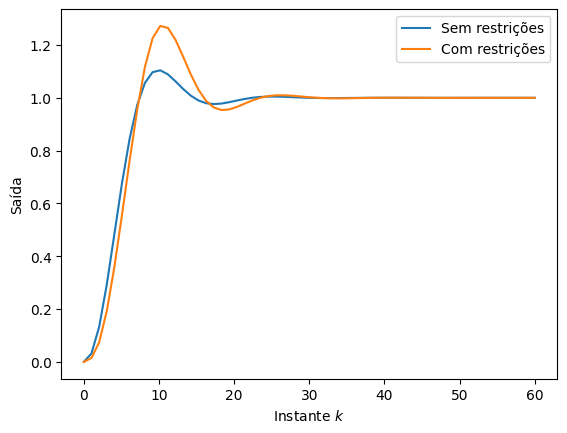

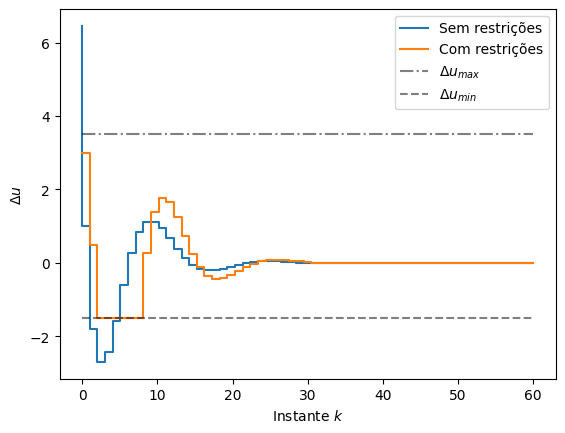

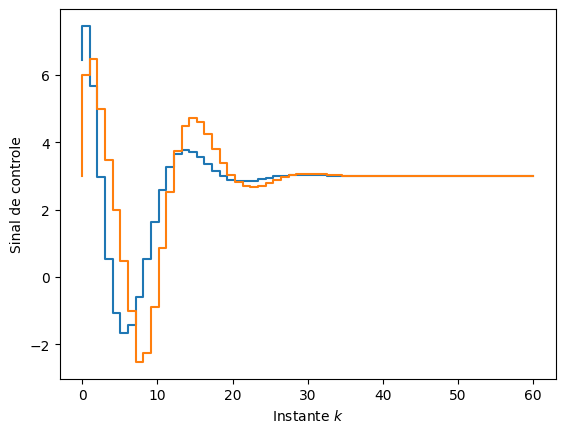

In [142]:
k_total = 60
x1 = zeros((k_total, 3, 1)) # sem restrição
x2 = zeros((k_total, 3, 1)) # com restrições
Delta_u1 = zeros((k_total, 1))
Delta_u2 = zeros((k_total, 1))

r = 1 # sinal de referência (constante)

# Matrizes de restrições e função de custo
R_s = ones((N_p, 1)) * r
R_barra = r_w*eye(N_c)
E = 2*(Phi.T@Phi + R_barra)                # constante

F_a = - 2 * Phi.T @ F                        # constante
F_b = - 2 * Phi.T @ ones((N_p, 1)) * r # constante (neste exemplo, r(k) = 1)

M = array([[1, 0, 0], [-1, 0, 0]])
gamma = array([[3, 1.5]]).T



for k in range(k_total-1):
    Delta_u1[k] = Ky * r - Kx @ x1[k]
    x1[k+1] = A @ x1[k] + B * Delta_u1[k]

    # calculando F estrela no instante k
    F_star = F_b - F_a @ x2[k]
    F_star = -2 * Phi.T @ (R_s - F@x2[k])
    opt = Ky * r - Kx @ x2[k]
    
    d = HildrethQP(E, F_star, M, gamma)

    Delta_u2[k] = d[0]

    x2[k+1] = A @ x2[k] + B * Delta_u2[k]

    

k = linspace(0, k_total, k_total)    
u1 = cumsum(Delta_u1)
u2 = cumsum(Delta_u2)
figure()
plot(k, x1[:,-1], label='Sem restrições')
plot(k, x2[:,-1], label='Com restrições')
xlabel("Instante $k$")
ylabel("Saída")

legend();

figure()
step(k, Delta_u1, label='Sem restrições')
step(k, Delta_u2, label='Com restrições')
plot([0, k_total], [3.5, 3.5] , 'k-.', alpha=0.5, label='$\Delta u_{max}$')
plot([0, k_total], [-1.5, -1.5] ,'k--', alpha=0.5, label='$\Delta u_{min}$')
xlabel("Instante $k$")
ylabel("$\Delta u$")
legend()

figure()
step(k, u1[:], label='Sem restrições')
step(k, u2, label='Com restrições')
ylabel("Sinal de controle")
xlabel("Instante $k$")

### Exemplo: Restrições na variável de controle

Usando o mesmo sistema do exemplo anterior, será considerado agora a restrição em $u(k)$ tal que:

\begin{equation*}
    -3 \leq u(k) \leq 6
\end{equation*}

\begin{equation*}
    u(k) = \Delta u(k) + u(k - 1); \Delta u(k) = \left[1\ 0\ 0\right]\Delta U
\end{equation*}

O vetor $\Delta U$ é o parâmetro a ser otimizado. Então, as restrições de desigualdades podem ser expressas como:

\begin{equation*}
    -3 \leq \Delta u(k) + u(k - 1) \leq 6; 
\end{equation*}

Ou seja, 
\begin{equation*}
    \begin{bmatrix}
    1 & 0 & 0 \\ -1 & 0 & 0
    \end{bmatrix}
    \begin{bmatrix}
        \Delta u(k) \\ \Delta u(k+1) \\ \Delta u(k+2)
    \end{bmatrix}
    \leq
    \begin{bmatrix}
        6 - u(k-1) \\ 3 + u(k-1)
    \end{bmatrix}
\end{equation*}

Ou seja, a matriz de restrições varia com $k$ a medida que a variável $u$ é atualizada.

Text(0.5, 0, 'Instante $k$')

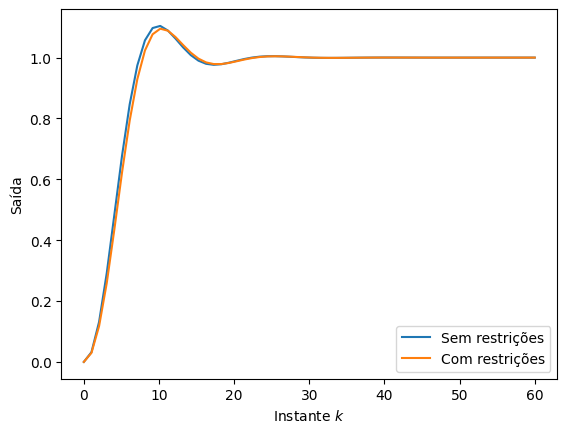

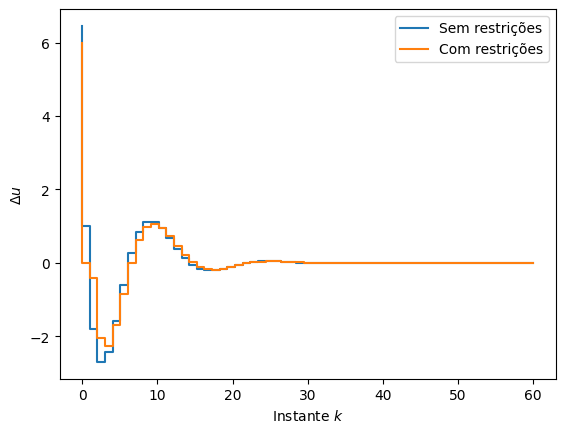

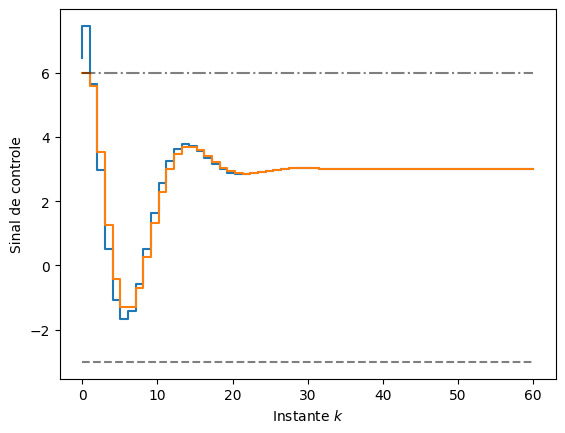

In [143]:
def gamma(u):
    "u = u[k -1]"
    return array([[6 - u], [3 + u]])

# vetores de estados
u3_0 = 0
x3 = zeros((k_total, 3, 1))
Delta_u3 = zeros((k_total, 1))

# Matrizes de restrições e função de custo
R_s = ones((N_p, 1)) * r
R_barra = r_w*eye(N_c)
E = 2*(Phi.T@Phi + R_barra)                  # constante

F_a = 2 * Phi.T @ F                        # constante
F_b = - 2 * Phi.T @ ones((N_p, 1)) * r # constante (neste exemplo, r(k) = 1)

for ki in range(k_total - 1):
    gamma_k = gamma(u3_0)
    f = F_a @ x3[ki] + F_b
    
    DeltaU = HildrethQP(E, f, M, gamma_k)
    Delta_u3[ki] = DeltaU[0]
    u3_0 += DeltaU[0,0]
    
    x3[ki+1] = A @ x3[ki] + B * Delta_u3[ki]


figure()
plot(k, x1[:,-1], label='Sem restrições')
plot(k, x3[:,-1], label='Com restrições')
xlabel("Instante $k$")
ylabel("Saída")

legend();

figure()
step(k, Delta_u1, label='Sem restrições')
step(k, Delta_u3, label='Com restrições')

xlabel("Instante $k$")
ylabel("$\Delta u$")
legend()

figure()
step(k, u1[:], label='Sem restrições')
step(k, cumsum(Delta_u3), label='Com restrições')
plot([0, k_total], [6, 6] , 'k-.', alpha=0.5, label='$u_{max}$')
plot([0, k_total], [-3, -3] ,'k--', alpha=0.5, label='$u_{min}$')
ylabel("Sinal de controle")
xlabel("Instante $k$")


In [144]:
f[0].shape

(1,)

In [145]:
E[0,0].shape

()

In [146]:
f.shape

(3, 1)